<a href="https://colab.research.google.com/github/nishitachaubey/AS-Autozone/blob/main/Customer_Segmentaion_using_kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #numpy arrays
import pandas as pd #pandas are for making Dataframes is gives structures data set
import matplotlib.pyplot as plt #Its is used for ploting
import seaborn as sns # ploting libarary
from sklearn.cluster import KMeans #Importing Kmean clusting algorithm here


In [3]:
coustomer_data =pd.read_csv('/content/Mall_Customers.csv')

In [4]:
coustomer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = coustomer_data.iloc[:,[3,4]].values

In [15]:
wcss=[]
for i in range (1,11):
  kmeans =KMeans(n_clusters=i,init='k-means++',random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [16]:
print(wcss)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


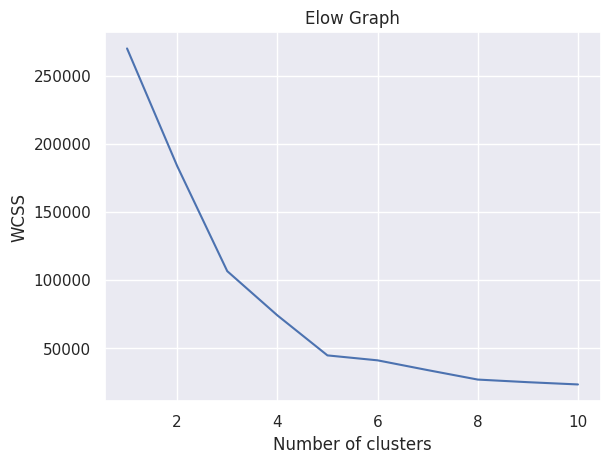

In [17]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#3 ND 5 ARE THE 2 CUTTING ELBOW POINTS SO OPTIMAL NUMBER OF CLUSTERS ARE 5


In [22]:
# TRAINING THE k-MEANS Clustering Model
kmeans= KMeans(n_clusters=5, init='k-means++',random_state=0)

# RETURN A LABEL FOR EACH DATA POINT BASED ON THEIR CLUSTER
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


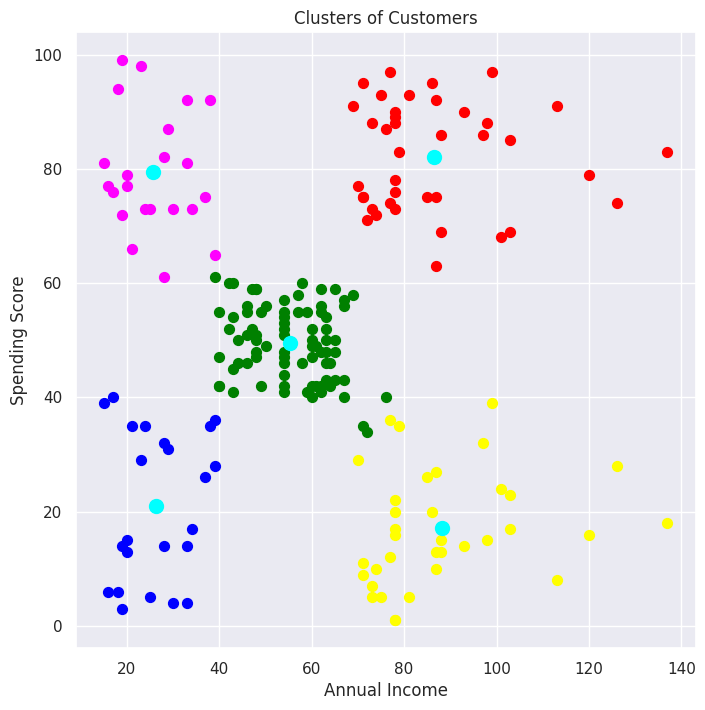

In [25]:
#PLOTING ALL THE CLUSTERS AND THEIR CENTRIODS
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()